In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

def apply_global_settings():
    plt.rc('axes', edgecolor='none')
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.bottom'] = False
    sns.set_palette("deep")
    plt.rcParams["font.family"] = "Inter"
    plt.rcParams["font.size"] = 10
apply_global_settings()

| **NOMBRE DE LA COLUMNA**        | **TIPO DE DATO**  | **DEFINICIÓN**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ---------------------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| CDPHId                 | Texto plano | Número de identificación interno del producto del Departamento de Salud Pública de California (CDPH). Tenga en cuenta que el CDPHId puede aparecer más de una vez si un producto tiene más de un Color/Aroma/Sabor, más de una Categoría o más de un Nombre Químico/número CAS reportado.                                                                                                                                                                                                                                                                                                                                  |
| ProductName            | Texto plano | Nombre del producto tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre del producto se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                               |
| CSFId                  | Texto plano | Número de identificación interno del CDPH para un color/aroma/sabor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CSF                    | Texto plano | Color, aroma y/o sabor tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre del color/aroma/sabor se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores. No todos los productos tienen colores, aromas o sabores específicos.                                                                                                                                                                                                                                                                                                              |
| CompanyId              | Texto plano | Número de identificación interno del CDPH para la empresa.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| CompanyName            | Texto plano | Nombre de la empresa tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre de la empresa se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                             |
| BrandName              | Texto plano | Nombre de la marca tal como lo ingresó el fabricante, empacador y/o distribuidor. El nombre de la marca se ingresa como texto libre en la base de datos de informes y puede contener errores ortográficos u otros errores.                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrimaryCategoryId      | Texto plano | Número de identificación interno del CDPH para la categoría.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrimaryCategory        | Texto plano | Tipo de producto (13 categorías principales: Productos para bebés, Productos de baño, Fragancias, Productos para el cuidado del cabello (sin coloración), Productos para la coloración del cabello, Productos de maquillaje (no permanente), Productos para uñas, Productos de higiene bucal, Productos de cuidado personal, Productos para el afeitado, Productos para el cuidado de la piel, Productos relacionados con el sol, Tatuajes y maquillaje permanente). Consulte el archivo adjunto para las subcategorías dentro de cada categoría principal (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.csv). |
| SubCategoryId          | Texto plano | Número de identificación interno del CDPH para la subcategoría.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SubCategory            | Texto plano | Tipo de producto dentro de una de las 13 categorías principales. Consulte el archivo adjunto para las subcategorías dentro de cada categoría principal (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.xls).                                                                                                                                                                                                                                                                                                                                                                                                     |
| CASId                  | Texto plano | Número de identificación interno del CDPH para el químico.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| CasNumber              | Texto plano | Número de identificación química (número de registro del Servicio de Resúmenes Químicos asignado a un químico específico). Tenga en cuenta que diferentes formas de un químico pueden tener diferentes números CAS. Lo que aparece aquí es el número CAS seleccionado por el fabricante, empacador y/o distribuidor.                                                                                                                                                                                                                                                                                                       |
| ChemicalId             | Texto plano | Número de identificación interno del CDPH para el registro de este químico específico para este producto.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ChemicalName           | Texto plano | Nombre de la sustancia química en el producto cosmético. Tenga en cuenta que las sustancias químicas pueden tener más de un Nombre Químico. Lo que aparece aquí es el nombre químico seleccionado por el fabricante, empacador y/o distribuidor. La Ley de Cosméticos Seguros de California requiere que las empresas de cosméticos informen sobre productos que contengan ingredientes conocidos o sospechosos de causar cáncer o daño reproductivo o de desarrollo.                                                                                                                                                      |
| InitialDateReported    | Fecha       | Fecha en que el perfil del producto fue creado por el fabricante, empacador y/o distribuidor, es decir, la fecha en que el producto fue reportado por primera vez al CDPH.                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MostRecentDateReported | Fecha       | Fecha en que el perfil del producto fue modificado por última vez por el fabricante, empacador y/o distribuidor. El perfil del producto contiene toda la información sobre el producto con la excepción de la información química, que se almacena por separado. Este campo se predetermina al valor de InitialDateReported inicialmente.                                                                                                                                                                                                                                                                                  |
| DiscontinuedDate       | Fecha       | Si corresponde, fecha en que el producto fue descontinuado.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ChemicalCreatedAt      | Fecha       | La fecha en que este químico fue reportado por primera vez al CDPH para este producto.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ChemicalUpdatedAt      | Fecha       | Fecha en que este informe químico fue modificado por última vez por el fabricante, empacador y/o distribuidor. Este campo es único del perfil del producto. Este campo se predetermina al valor de ChemicalCreatedAt inicialmente.                                                                                                                                                                                                                                                                                                                                                                                         |
| ChemicalDateRemoved    | Fecha       | Si corresponde, fecha en que el químico fue eliminado del producto, es decir, reformulación.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| ChemicalCount          | Número      | Número total de químicos actuales reportados para este producto. Este número no incluye los químicos que han sido eliminados de un producto. Este número es un campo calculado basado en los informes actuales.                                                                                                                                                                                                                                                                                                                                                                                                            |

# Analisis exploratorio

In [2]:
df_raw = pd.read_csv(
    "/home/augustom/Data_science_curso/chemicals-in-cosmetics-efaquy/chemicals-in-cosmetics.csv"
)
df_raw.head()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [3]:
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


In [4]:
df_raw.describe(include="object").transpose()

,count,unique,top,freq
ProductName,114635,33716,Eyecolor,766
CSF,80237,34326,Black,247
CompanyName,114635,606,L'Oreal USA,5747
BrandName,114408,2713,SEPHORA,3394
PrimaryCategory,114635,13,Makeup Products (non-permanent),75827
SubCategory,114635,89,"Lip Color - Lipsticks, Liners, and Pencils",16555
CasNumber,108159,125,13463-67-7,93049
ChemicalName,114635,123,Titanium dioxide,93480
InitialDateReported,114635,2274,10/13/2009,2557
MostRecentDateReported,114635,2178,12/30/2010,18127


In [5]:
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


# Data Cleaning

In [6]:
df_raw.duplicated().sum()
df_raw.drop_duplicates(inplace=True)

In [7]:
df_raw.isna().all()
df_raw.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

In [8]:
df_raw.head()


def remove_non_ascii(text):
    """Removes non-ASCII characters from a given string.

    Args:
      text: The input string.

    Returns:
      The string with non-ASCII characters removed.
    """

    return re.sub(r"[^\x00-\x7F]+", "", text)


df_raw["ProductName"] = df_raw["ProductName"].apply(remove_non_ascii)
df_raw["CompanyName"] = df_raw["CompanyName"].apply(remove_non_ascii)
df_raw["BrandName"] = df_raw["BrandName"].astype(str)
df_raw["BrandName"] = df_raw["BrandName"].apply(remove_non_ascii)
df_raw

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [9]:
print(df_raw.shape)
df_raw.drop_duplicates(
    subset=["CDPHId", "CSFId", "ChemicalId", "SubCategoryId"], inplace=True
)
print(df_raw.shape)
# Según el dataset estas columnas representan la clave primaria

(114381, 22)
(114377, 22)


In [10]:
# Remove columns with the same information, this is not important for the data analysys
# Para CAS number tengo nombre del químico
df_clean = df_raw.drop(
    [
        "CDPHId",
        "CSFId",
        "CompanyId",
        "PrimaryCategoryId",
        "ChemicalId",
        "SubCategoryId",
        "CasId",
        "CasNumber",
    ],
    axis=1,
)

In [11]:
print(df_clean.select_dtypes(object).nunique())
print(df_clean.select_dtypes(np.number).nunique())

ProductName               33712
CSF                       34326
CompanyName                 606
BrandName                  2705
PrimaryCategory              13
SubCategory                  89
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         523
dtype: int64
ChemicalCount    10
dtype: int64


In [12]:
def convert_to_datetime(df, columns):
    """Converts specified columns to datetime format.

    Args:
      df: The pandas DataFrame containing columns to be converted.
      columns: A list of column names to convert to datetime format.

    Returns:
      The DataFrame with specified columns converted to datetime.
    """

    for col in columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    return df


convert_to_datetime(
    df_clean,
    [
        "InitialDateReported",
        "MostRecentDateReported",
        "DiscontinuedDate",
        "ChemicalCreatedAt",
        "ChemicalUpdatedAt",
        "ChemicalDateRemoved",
    ],
)
df_clean["ChemicalCount"] = df_raw["ChemicalCount"].astype(np.int64)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114377 entries, 0 to 114634
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             114377 non-null  object        
 1   CSF                     80225 non-null   object        
 2   CompanyName             114377 non-null  object        
 3   BrandName               114377 non-null  object        
 4   PrimaryCategory         114377 non-null  object        
 5   SubCategory             114377 non-null  object        
 6   ChemicalName            114377 non-null  object        
 7   InitialDateReported     114377 non-null  datetime64[ns]
 8   MostRecentDateReported  114377 non-null  datetime64[ns]
 9   DiscontinuedDate        12873 non-null   datetime64[ns]
 10  ChemicalCreatedAt       114377 non-null  datetime64[ns]
 11  ChemicalUpdatedAt       114377 non-null  datetime64[ns]
 12  ChemicalDateRemoved     2982 non-nu

In [13]:
df_clean["ChemicalName"].value_counts()
df_clean.replace(
    {
        "ChemicalName": "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents."
    },
    "Retinol/retinyl esters",
    inplace=True,
)
df_clean.replace(
    {"ChemicalName": "Carbon black (airborne, unbound particles of respirable size)"},
    "Carbon black",
    inplace=True,
)
df_clean.replace(
    {"ChemicalName": "Silica, crystalline (airborne particles of respirable size)"},
    "Silica crystalline",
    inplace=True,
)
df_clean["ChemicalName"].value_counts()

ChemicalName
Titanium dioxide                                     93479
Silica crystalline                                    2816
Carbon black                                          2198
Retinol/retinyl esters                                2154
Mica                                                  1919
                                                     ...  
2-Propyleneacrolein                                      1
N-Nitrosodiethanolamine                                  1
Vinyl acetate                                            1
Phenacemide                                              1
Diethanolamides of the fatty acids of coconut oil        1
Name: count, Length: 122, dtype: int64

In [14]:
objective_columns = df_clean.select_dtypes(np.datetime64).columns
condition = (df_clean[objective_columns] > pd.to_datetime("2007-01-01")) & (
    df_clean[objective_columns] < pd.to_datetime("2023-01-01")
)
df_clean[objective_columns] = df_clean[objective_columns].where(
    condition,
    np.nan,
)
df_clean.select_dtypes(np.datetime64).describe().transpose()
# Datos comienzan en 2007 y terminan en 2023

,count,mean,min,25%,50%,75%,max
InitialDateReported,114377,2013-11-25 07:56:31.762330112,2009-06-17 00:00:00,2009-12-16 00:00:00,2013-09-23 00:00:00,2017-08-07 00:00:00,2020-06-23 00:00:00
MostRecentDateReported,114377,2015-05-03 14:33:17.331631104,2009-07-01 00:00:00,2011-08-25 00:00:00,2015-07-09 00:00:00,2018-10-12 00:00:00,2020-06-24 00:00:00
DiscontinuedDate,12809,2013-08-16 21:19:21.027402752,2007-01-19 00:00:00,2011-06-30 00:00:00,2013-11-01 00:00:00,2016-01-31 00:00:00,2020-06-12 00:00:00
ChemicalCreatedAt,114377,2013-12-31 01:40:48.460791808,2009-07-01 00:00:00,2009-12-22 00:00:00,2013-10-10 00:00:00,2017-10-13 00:00:00,2020-06-23 00:00:00
ChemicalUpdatedAt,114377,2014-04-02 18:36:45.946999808,2009-07-01 00:00:00,2010-03-29 00:00:00,2014-04-01 00:00:00,2017-12-12 00:00:00,2020-06-24 00:00:00
ChemicalDateRemoved,2864,2013-01-16 07:05:51.955307520,2009-01-01 00:00:00,2009-12-14 00:00:00,2012-08-24 00:00:00,2015-08-04 18:00:00,2020-05-14 00:00:00


# Análisis de los datos
## Vista General

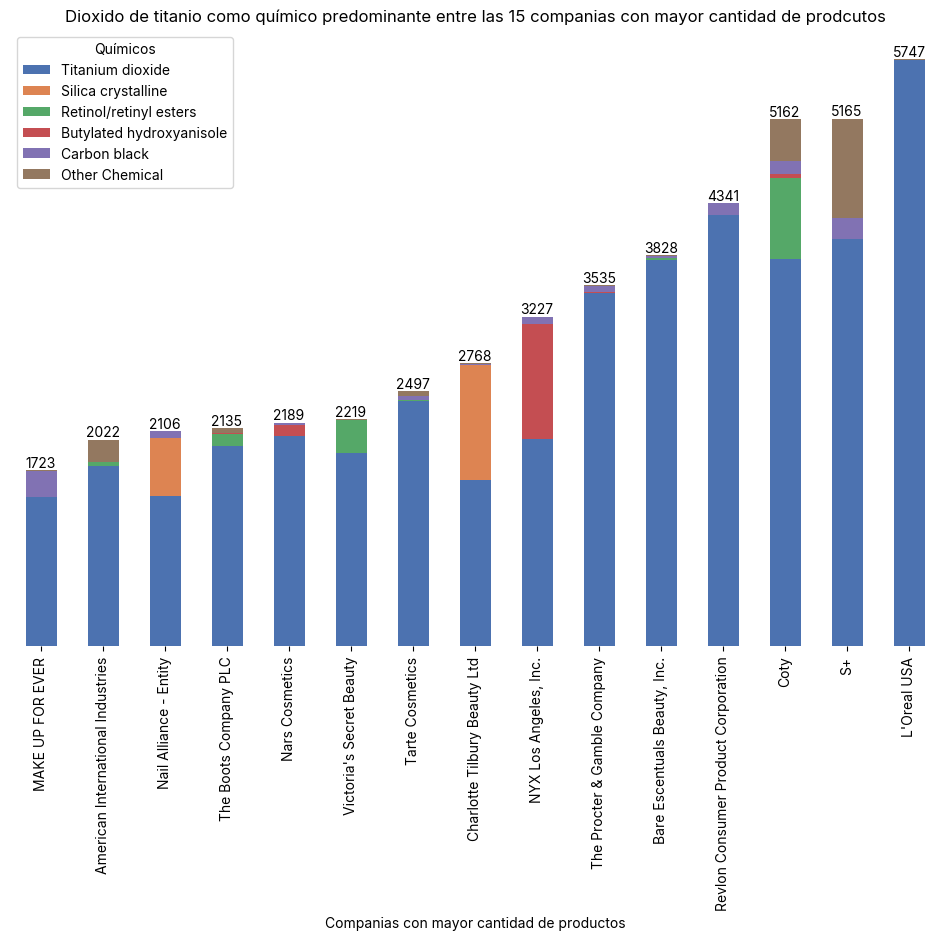

In [15]:
major_companies = (
    df_clean.groupby("CompanyName")["ProductName"].count().sort_values().tail(15)
)

filtered_df = df_clean[df_clean["CompanyName"].isin(major_companies.index)]

pivot_table = filtered_df.pivot_table(
    index="CompanyName", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    major_companies.index
)
pivot_table.plot(kind="bar", stacked=True, figsize=(12, 8))

values = major_companies.values
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)


plt.title(
    "Dioxido de titanio como químico predominante entre las 15 companias con mayor cantidad de prodcutos"
)
plt.ylabel("Cantidad de productos")
plt.xlabel("Companias con mayor cantidad de productos")
plt.gca().get_yaxis().set_visible(False)
plt.legend().set_title("Químicos")

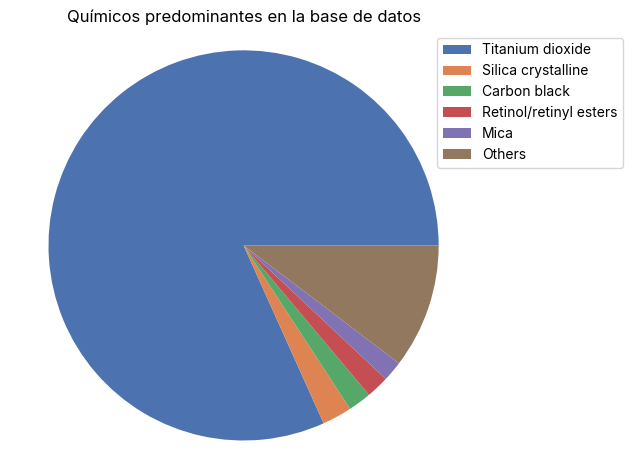

In [16]:
top_5 = (
    df_clean.groupby("ChemicalName")["ProductName"]
    .count()
    .sort_values(ascending=False)
    .iloc[:5]
)
otros = (
    df_clean.groupby("ChemicalName")["ProductName"]
    .count()
    .sort_values(ascending=False)
    .iloc[5:]
    .sum()
)
pie_DF = pd.DataFrame(top_5)
others_df = pd.DataFrame({"ProductName": [otros]}, index=["Others"])
pie_DF = pd.concat([pie_DF, others_df])
pie_DF.plot.pie(y="ProductName", labels=None)
plt.title("Químicos predominantes en la base de datos")
plt.axis("off")
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.
labels = pie_DF.index
plt.legend(labels, bbox_to_anchor=(0.9, 1))
plt.tight_layout()

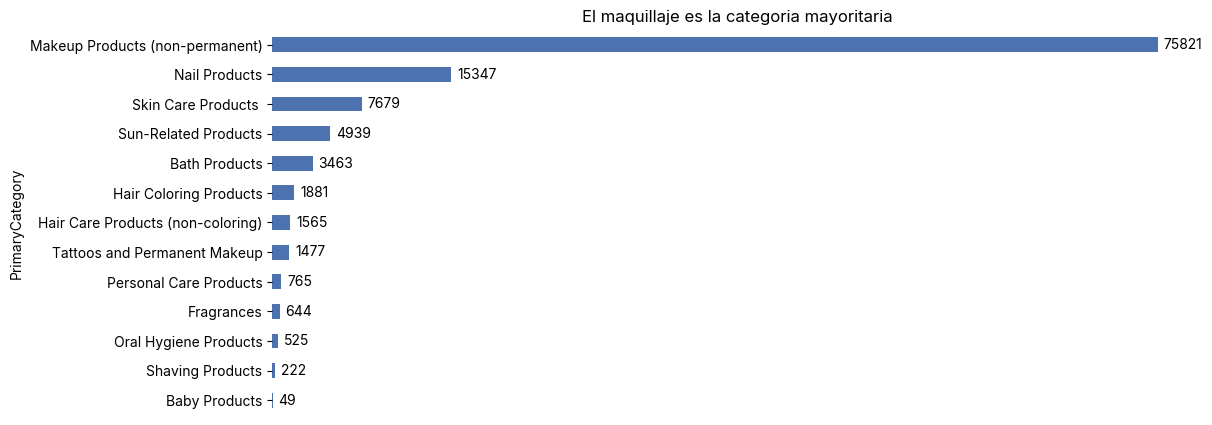

In [17]:
Productos_categoria = df_clean.groupby("PrimaryCategory")["ProductName"].count().sort_values()
plt.title("El maquillaje es la categoria mayoritaria")
plt.ylabel("Categoria Primaria")
plt.xlabel("Cantidad de productos")
Productos_categoria.plot.barh(figsize=(12,5))
values = Productos_categoria.values
for i, value in enumerate(values):
    plt.text(value + 500, i, str(value), ha="left", va="center", fontsize=10)

plt.gca().get_xaxis().set_visible(False)


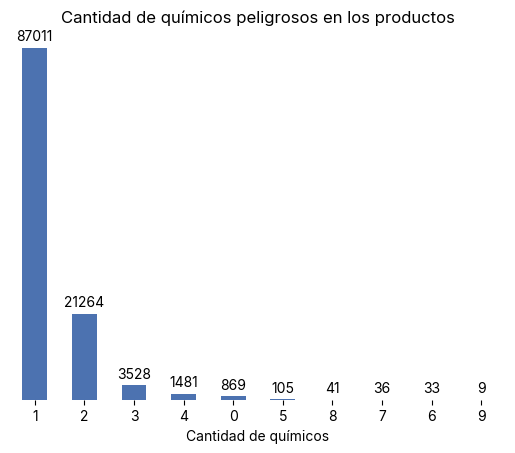

In [18]:
Chemical_counts = df_clean["ChemicalCount"].value_counts()
Chemical_counts.plot.bar()
values = Chemical_counts.values
for i, value in enumerate(values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.title("Cantidad de químicos peligrosos en los productos")
plt.ylabel("Cantidad de productos con x cantidad de químicos")
plt.xlabel("Cantidad de químicos")
plt.gca().get_yaxis().set_visible(False)

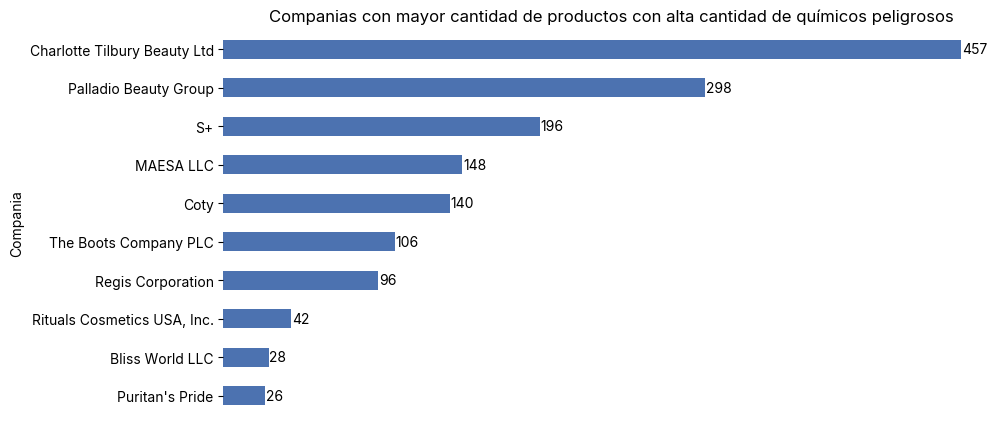

In [19]:
df_most_toxix = df_clean[df_clean["ChemicalCount"] >= 4]

df_most_toxic_plot = (
    df_most_toxix.groupby(["CompanyName"])["ProductName"].count().sort_values().tail(10)
)

df_most_toxic_plot.plot.barh(figsize=(10,5))

values = df_most_toxic_plot.values
for i, value in enumerate(values):
    plt.text(value + 0.5, i, str(value), ha="left", va="center", fontsize=10)

plt.title(
    "Companias con mayor cantidad de productos con alta cantidad de químicos peligrosos"
)
plt.xlabel("Cantidad de productos con alta cantidad de quimicos peligrosos")
plt.ylabel("Compania")

plt.gca().get_xaxis().set_visible(False)

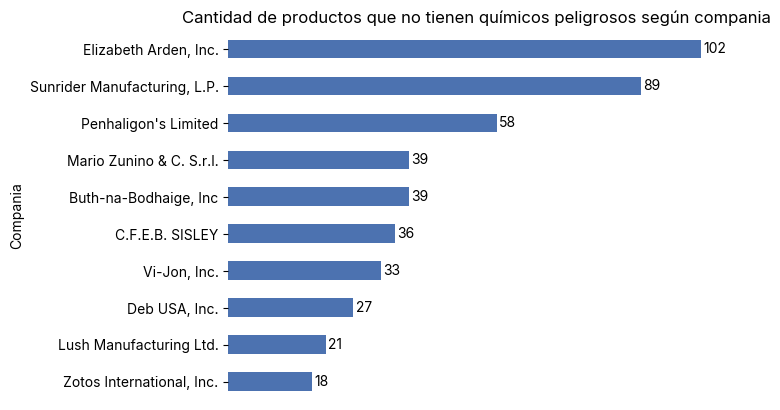

In [20]:
df_least_toxic = df_clean[df_clean["ChemicalCount"] == 0]
df_least_toxic = df_least_toxic.groupby("CompanyName")["ProductName"].count().sort_values().tail(10)
df_least_toxic.plot.barh()
values = df_least_toxic.values
for i, value in enumerate(values):
    plt.text(value + 0.5, i, str(value), ha="left", va="center", fontsize=10)

plt.title("Cantidad de productos que no tienen químicos peligrosos según compania")
plt.xlabel("Cantidad de productos")
plt.ylabel("Compania")
plt.gca().get_xaxis().set_visible(False)

## Productos descontinuados

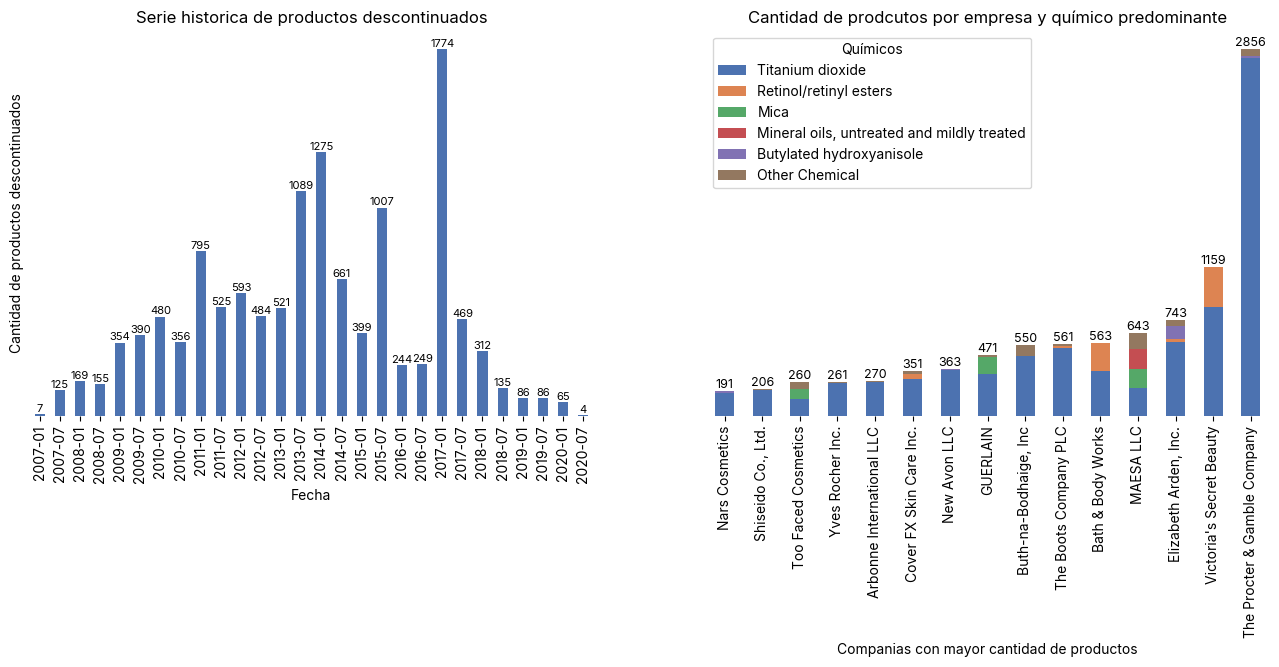

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

df_resampled = (
    df_clean.set_index(["DiscontinuedDate"])["ProductName"].resample("6ME").count()
)
df_resampled.index = df_resampled.index.strftime("%Y-%m")


df_resampled.plot(kind="bar", ax=ax[0])

values_1 = df_resampled.values
for i, value in enumerate(values_1):
    ax[0].text(i, value + 1, str(value), ha="center", va="bottom", fontsize=8)

ax[0].set_title(
    "Serie historica de productos descontinuados",
)
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Cantidad de productos descontinuados")

Descontinuated = df_clean.loc[df_clean["DiscontinuedDate"].notna()]

major_companies = (
    Descontinuated.groupby("CompanyName")["ProductName"].count().sort_values().tail(15)
)

filtered_df = Descontinuated[Descontinuated["CompanyName"].isin(major_companies.index)]

pivot_table = filtered_df.pivot_table(
    index="CompanyName", columns="ChemicalName", aggfunc="size", fill_value=0
)

top_5_chemicals = pivot_table.sum().sort_values(ascending=False).head(5).index

pivot_table["Other Chemical"] = pivot_table.drop(columns=top_5_chemicals).sum(axis=1)

pivot_table = pivot_table[top_5_chemicals.tolist() + ["Other Chemical"]].reindex(
    major_companies.index
)
values = major_companies.values
for i, value in enumerate(values):
    ax[1].text(i, value + 1, str(value), ha="center", va="bottom", fontsize=9)

pivot_table.plot(kind="bar", stacked=True, ax=ax[1])

ax[1].set_title("Cantidad de prodcutos por empresa y químico predominante")
ax[1].set_ylabel("Cantidad de productos descontinuados")
ax[1].set_xlabel("Companias con mayor cantidad de productos")

ax[1].set_yticks([])
ax[0].set_yticks([])
ax[1].get_yaxis().set_visible(False)
ax[1].legend().set_title("Químicos")

# Desarrollo del modelo
### Modulos a importar de las librerias de ML

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.compose import ColumnTransformer

In [23]:
condition_created = df_clean["InitialDateReported"] < df_clean["ChemicalCreatedAt"]
condition_equal = df_clean["InitialDateReported"] == df_clean["ChemicalCreatedAt"]
df_clean[condition_equal]

df_ML_raw = df_clean[condition_equal].drop(
    columns=["ChemicalDateRemoved", "ChemicalCreatedAt"]
)
df_ML_raw["Descontinuado"] = np.where(df_ML_raw["DiscontinuedDate"].notna(), 1, 0)
df_ML_raw.drop(columns=["DiscontinuedDate"], inplace=True)

In [24]:
for date in df_ML_raw.select_dtypes("datetime64").columns:
    df_ML_raw[date + "_Year"] = df_ML_raw[date].dt.year
    df_ML_raw[date + "_Month"] = df_ML_raw[date].dt.month

cols_to_drop = [col for col in df_ML_raw.columns if df_ML_raw[col].dtype == "datetime64[ns]"]
df_ML_raw = df_ML_raw.drop(columns=cols_to_drop)

In [25]:
# Eliminar valores nulos
df_ML = df_ML_raw.dropna()

# Separo categorias numericas de strings
object_cols = df_ML.select_dtypes(include="object").columns

# Saco la el target de las categorias númericas desde ahora asi no jode
numeric_cols = (
    df_ML.select_dtypes(exclude="object").drop(columns="Descontinuado").columns
)

# defino una secuencia de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", OneHotEncoder(sparse_output=True), object_cols),
        (
            "numerical",
            "passthrough",
            numeric_cols,
        ),
    ],
)

# Defino que tipo de selector de features voy a usar
feature_selector = SelectKBest(chi2, k="all")  # Adjust k as needed

# Creo un pipeline para que funcione mas rápido
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("feature_selection", feature_selector)]
)

# Separo el target
y = df_ML["Descontinuado"]

# aplico la transformacion y la seleccion de features
pipeline.fit(df_ML, y)

# Obtengo la sparse matrix de features
X_combined_selected = pipeline.transform(df_ML)

p_values = feature_selector.pvalues_
p_value_threshold = 0.05

# Creo una condicion para eliminar features
selected_features_mask = p_values < p_value_threshold

# Aplico la condicion en la sparse matrix
X_combined_selected = X_combined_selected[:, selected_features_mask]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined_selected, y, test_size=0.2, random_state=42
)

In [26]:
svc_pipeline = Pipeline(
    [
        ("scaling", MaxAbsScaler()),
        ("SVC", LinearSVC()),
    ]
)

param_grid = {
    "SVC__C": [0.001, 0.01, 0.1, 1, 10, 100],
}
grid = GridSearchCV(svc_pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', MaxAbsScaler()),
                                       ('SVC', LinearSVC())]),
             param_grid={'SVC__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [27]:
print("Best params:\n{}\n".format(grid.best_params_))
y_pred_SVC = grid.best_estimator_.predict(X_test)

Best params:
{'SVC__C': 1}



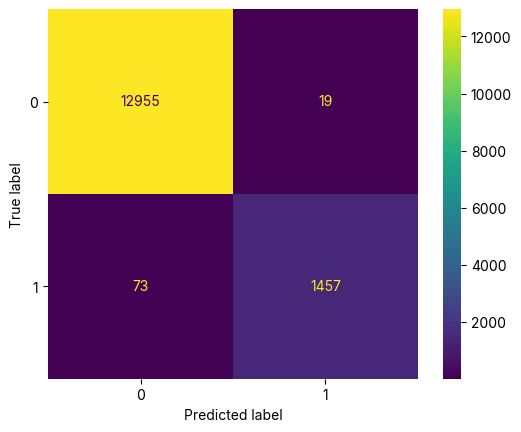

In [28]:
svc_cm = confusion_matrix(y_test, y_pred_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,display_labels=grid.best_estimator_.classes_)
disp.plot()